<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/pract6_BONUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('WineQT.csv')
dataset.head()

Saving WineQT.csv to WineQT.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
# Step 2: Check for missing values
print("Missing values:")
print(dataset.isnull().sum()) # Changed 'data' to 'dataset'

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [10]:
# Step 3: Separate features and target variable
X = dataset.drop("quality", axis=1) # Changed 'data' to 'dataset'
y = dataset["quality"] # Changed 'data' to 'dataset'
# Convert target into binary classification (good/bad wine)
y = np.where(y >= 6, 1, 0)  # Quality 6 or higher -> Good (1), else Bad (0)


In [11]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Step 5: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Step 6: Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

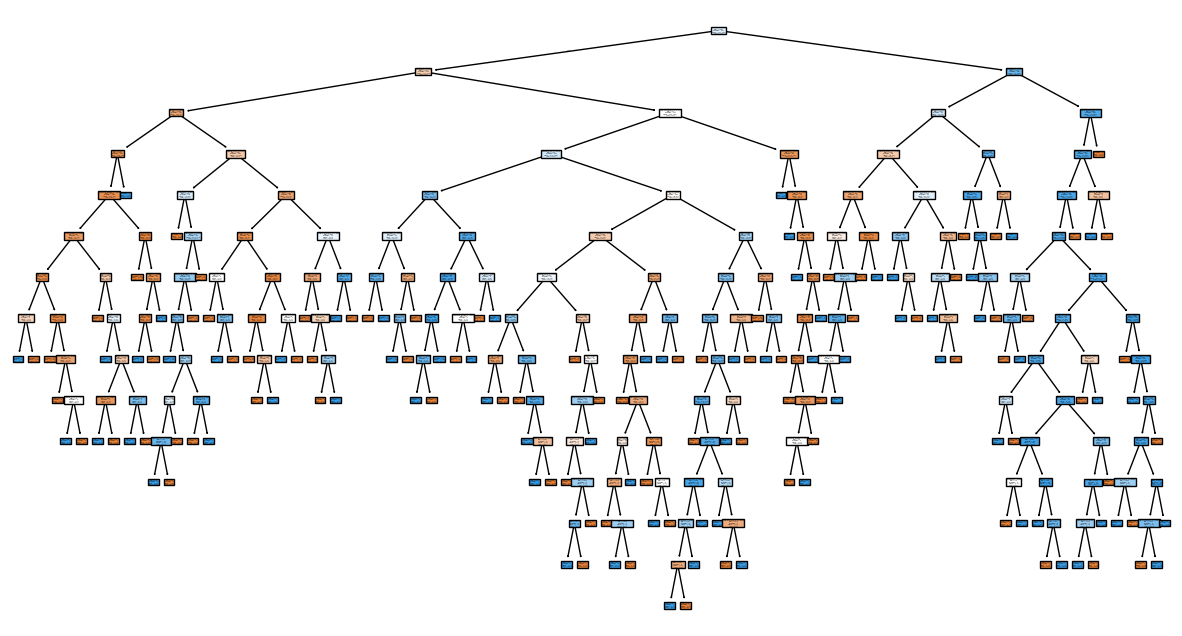

In [14]:
# Step 7: Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Bad", "Good"], filled=True)
plt.show()

In [15]:
# Step 8: Evaluate the model
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7379912663755459
Precision: 0.753968253968254
Recall: 0.7661290322580645
F1 Score: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       105
           1       0.75      0.77      0.76       124

    accuracy                           0.74       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229



In [16]:
# Step 9: Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final Model Precision:", precision_score(y_test, y_pred_best))
print("Final Model Recall:", recall_score(y_test, y_pred_best))
print("Final Model F1 Score:", f1_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.731928181108509
Final Model Accuracy: 0.7074235807860262
Final Model Precision: 0.6993006993006993
Final Model Recall: 0.8064516129032258
Final Model F1 Score: 0.7490636704119851
